In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = sns.load_dataset(name='iris')
df = pd.DataFrame(data)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Useful Functions

In [ ]:
def mean(arr):
  return np.mean(arr)

def covariance(arr1, arr2):
  m1 = mean(arr1)
  m2 = mean(arr2)
  return(sum((x - m1) * (y - m2) for x, y in zip(arr1, arr2)) / (len(arr1)-1))

def standardised(arr):
  m = mean(arr)
  v = variance(arr)
  for i in range(len(arr)):
    arr[i] = (arr[i] - m)/np.sqrt(v)
  return(arr)

In [ ]:
col1 = standardised(list(data['sepal_length']))
col2 = standardised(list(data['sepal_width']))
col3 = standardised(list(data['petal_length']))
col4 = standardised(list(data['petal_width']))
attributes = [col1, col2, col3, col4]
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
attribute = data[names]

# Question 1

In [ ]:
covariance_matrix = np.zeros((4, 4))
for i in range(4):
  for j in range(4):
    covariance_matrix[i][j] = covariance(attributes[i], attributes[j])

covariance_matrix = np.round(covariance_matrix, decimals=3)
print("Covariance Matrix: \n")
cov_df=pd.DataFrame(covariance_matrix,columns=names,index=names)
cov_df

Covariance Matrix: 



,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.007,-0.118,0.878,0.823
sepal_width,-0.118,1.007,-0.431,-0.369
petal_length,0.878,-0.431,1.007,0.969
petal_width,0.823,-0.369,0.969,1.007


# Question 2

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
n = 4
pc = eigenvectors[:, :n]
print('The Four Eigenvalues are:')
pd.DataFrame(eigenvalues)

The Four Eigenvalues are:


,0
0,2.938072
1,0.920651
2,0.148051
3,0.021225


In [ ]:
print('Four Principal Components of data:\n')
pd.DataFrame(pc)

Four Principal Components of data:



,0,1,2,3
0,0.521086,-0.377695,-0.718394,0.264055
1,-0.269321,-0.923225,0.244528,-0.123803
2,0.580451,-0.024882,0.139365,-0.801894
3,0.564811,-0.066197,0.636155,0.521453


# Question 3

In [ ]:
two_d = eigenvalues[:2]
three_d = eigenvalues[:3]
top_2 = eigenvectors[:, :2]
top_3 = eigenvectors[:, :3]
two = np.dot(attribute, top_2)
three = np.dot(attribute, top_3)
print('Reduced data shape for two dimentions:', two.shape)
print('Two Dimentional dataset:')
print(two)
print()
print('Reduced data shape for three dimentions:', three.shape)
print('Three Dimentional dataset:')
print(three)

Reduced data shape for two dimentions: (150, 2)
Two Dimentional dataset:
[[ 2.64051203 -5.20560896]
 [ 2.67095516 -4.66845722]
 [ 2.45482857 -4.77507504]
 [ 2.54574225 -4.64995946]
 [ 2.5614713  -5.26016198]
 [ 2.97620721 -5.70891185]
 [ 2.46338198 -4.93105858]
 [ 2.67338059 -5.07800514]
 [ 2.437344   -4.38728711]
 [ 2.64558709 -4.75664827]
 [ 2.80101893 -5.50605082]
 [ 2.62720841 -5.00495435]
 [ 2.5623654  -4.62406797]
 [ 2.12768679 -4.42775569]
 [ 2.7545219  -5.92663178]
 [ 2.88178249 -6.27885662]
 [ 2.74402672 -5.6989589 ]
 [ 2.69699313 -5.21222869]
 [ 3.10298414 -5.72327812]
 [ 2.674242   -5.49168456]
 [ 2.99790543 -5.23405967]
 [ 2.75765519 -5.40598175]
 [ 2.12085621 -5.09913097]
 [ 3.03795488 -5.0482878 ]
 [ 2.80134378 -5.01241906]
 [ 2.83915405 -4.71120321]
 [ 2.84438792 -5.09373285]
 [ 2.7506658  -5.24586671]
 [ 2.71955276 -5.15105593]
 [ 2.62896394 -4.78253975]
 [ 2.70800467 -4.72798673]
 [ 2.99477739 -5.24232267]
 [ 2.53259218 -5.79318222]
 [ 2.66042203 -6.0029448 ]
 [ 2.7020

# Question 4

In [ ]:
species = set(data['species'])
for s in species:
    D = data['petal_length'].where(data['species'] == s)
    D = list(filter(lambda x: not (str(x) == 'nan' or str(x) == 'NaN'), D))
    print("Shape of 'petal_length' for", s, ":", np.shape(D)[0])

Shape of 'petal_length' for virginica : 50
Shape of 'petal_length' for versicolor : 50
Shape of 'petal_length' for setosa : 50


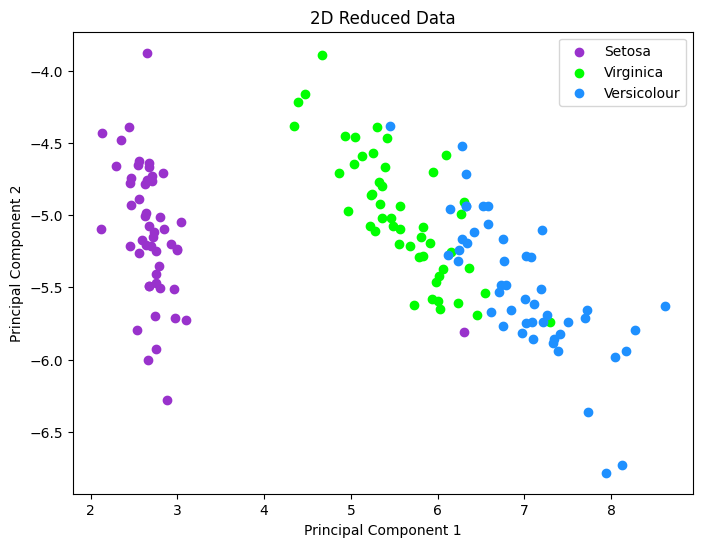

In [ ]:
plt.figure(figsize=(8, 6))
A=[point[0] for point in two]
B=[point[1] for point in two]
plt.scatter(A[:51], B[:51], c = 'darkorchid')
plt.scatter(A[51:101], B[51:101], c = 'lime')
plt.scatter(A[101:151], B[101:151], c = 'dodgerblue')
plt.title('2D Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(['Setosa', 'Virginica', 'Versicolour'])
plt.show()

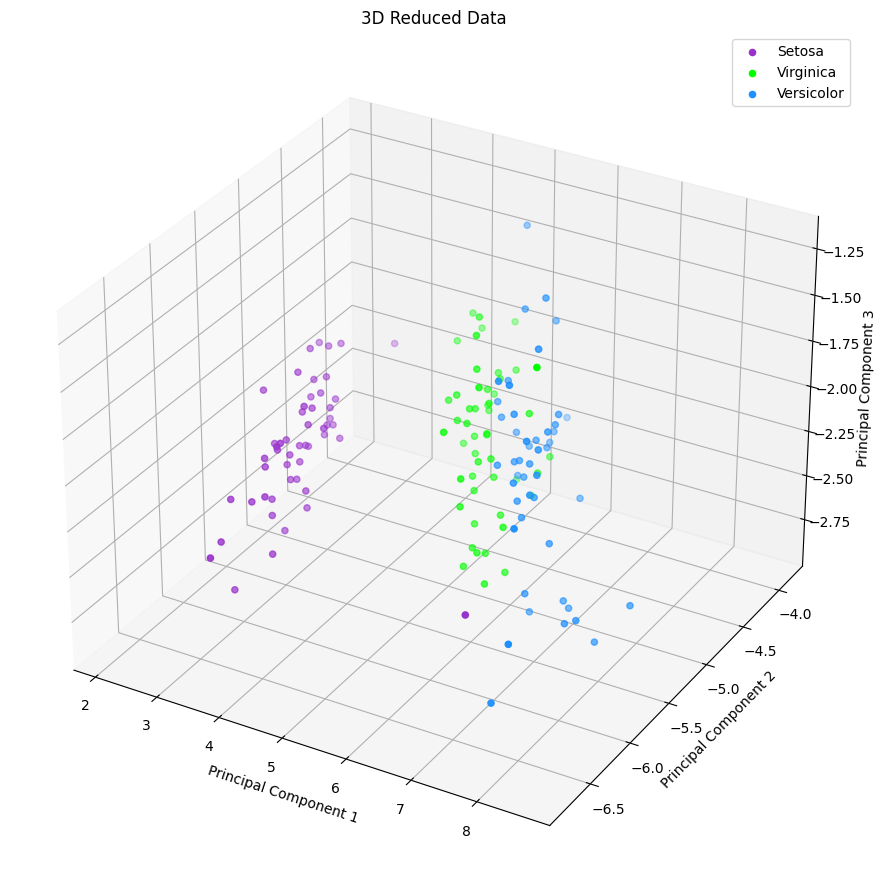

In [ ]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111,projection='3d')
A = [point[0] for point in three]
B = [point[1] for point in three]
C = [point[2] for point in three]
ax.scatter(A[:51], B[:51], C[:51], c = 'darkorchid')
ax.scatter(A[51:101], B[51:101], C[51:101], c = 'lime')
ax.scatter(A[101:151], B[101:151], C[101:151], c = 'dodgerblue')
ax.set_title('3D Reduced Data')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(['Setosa', 'Virginica', 'Versicolor'])